In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import h5py

### 加载数据集

In [15]:
def load_data():
    #读取本地文件，用h5py读取
    train_dataset = h5py.File('/Users/zwx/ZWXX/CS231/data_set/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('/Users/zwx/ZWXX/CS231/data_set/test_catvnoncat.h5')
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 
    
    classes = np.array(test_dataset["list_classes"][:]) 
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [16]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

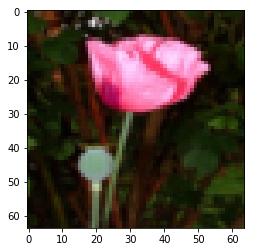

In [22]:
index = 30
plt.imshow(train_x_orig[index])#展示第index张图片

In [113]:
#把特征转化成二维的,并且需要标准化
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1) / 255
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1) / 255
print("train_x 的形状是：",train_x.shape)
print("test_x的形状是：",test_x.shape)
print("train_y的形状是：",train_y.shape)
print("test_y的形状是：",test_y.shape)

train_x 的形状是： (209, 12288)
test_x的形状是： (50, 12288)
train_y的形状是： (209,)
test_y的形状是： (50,)


### 利用逻辑回归实现简单的单层神经网络

#### 首先需要初始化w和b的值

In [122]:
def initial(n):
    
    #可以定义随机数种子
    
    #np.random.seed(1)
    #w = np.random.rand(1,n)
    w = np.zeros((1,n))
    b = np.zeros((1,1))
    
    return w,b

#### 定义sigmoid函数

In [123]:
def sigmoid(z):
    s_value = 1. / (1. + np.exp(-z))
    return s_value

#### 建立LR模型

In [124]:
def LR(X,Y,alpha,iter_,is_print,c,Regular):
    '''
    参数说明
    X:代表训练样本
    Y：代表训练样本的标签
    alpha：代表学习率
    iter_：迭代次数
    is_print:是否打印
    c：正则化时的惩罚项
    Regular：选择正则化的方式L1或L2
    '''
    m,n = X.shape
    w,b = initial(n)
    costs = []
    for i in range(iter_):
        z = np.dot(w,X.T) + b
        A = sigmoid(z)
        if Regular == 'l1':
            #计算损失函数  加上正则化 就在后面加一个惩罚项
            cost = -(np.sum((Y*np.log(A) + (1-Y)*np.log(1-A))) + c * np.sum(w))/m
        elif Regular == 'l2':
            cost = -(np.sum((Y*np.log(A) + (1 - Y)*np.log(1-A))) + (c/2) * np.sum(w**2))/m
        costs.append(cost)  
        if is_print and i % 100 == 0:
            print("迭代次数为:{},损失函数的值为:{}".format(i,cost))
            
        dz = A - Y
        dw = np.dot(dz,X) / m
        
        assert dw.shape == w.shape #这里判断的是形状是否一致，不一致会报错
        db = np.sum(dz,keepdims=True) / m
        assert db.shape == b.shape
        #更新w，b
        if Regular =="l2": 
            w = w - alpha * (dw + c * w)
            b = b - alpha * db
        elif Regular =="l1": 
            w = w - alpha * (dw + c * np.sign(w)) #这是一个判断函数
            b = b - alpha * db
            
    return w,b,costs

In [136]:
w,b,costs = LR(train_x,train_y,0.01,2000,True,0,'l2')

迭代次数为:0,损失函数的值为:0.6931471805599453
迭代次数为:100,损失函数的值为:0.8239208681637741
迭代次数为:200,损失函数的值为:0.4189445737520132
迭代次数为:300,损失函数的值为:0.6173497037778838
迭代次数为:400,损失函数的值为:0.5221157724941734
迭代次数为:500,损失函数的值为:0.38770874925253707
迭代次数为:600,损失函数的值为:0.23625445679106147
迭代次数为:700,损失函数的值为:0.1542221330669201
迭代次数为:800,损失函数的值为:0.13532782831331272
迭代次数为:900,损失函数的值为:0.12497148000220369
迭代次数为:1000,损失函数的值为:0.11647833125672787
迭代次数为:1100,损失函数的值为:0.10919251128214098
迭代次数为:1200,损失函数的值为:0.10280446418272242
迭代次数为:1300,损失函数的值为:0.0971298100803137
迭代次数为:1400,损失函数的值为:0.09204326923701496
迭代次数为:1500,损失函数的值为:0.08745251991839822
迭代次数为:1600,损失函数的值为:0.08328603053717921
迭代次数为:1700,损失函数的值为:0.07948657037903142
迭代次数为:1800,损失函数的值为:0.0760073457218095
迭代次数为:1900,损失函数的值为:0.07280949458617371


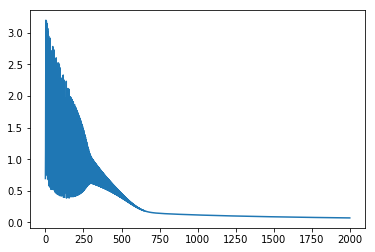

In [137]:
plt.plot(costs)

### 预测函数

In [138]:
def predict(X,Y,w,b):
    z = np.dot(w,X.T) + b
    A = sigmoid(z)
    
    predict_y = np.round(A) 
    
    accurate = np.sum((predict_y==Y))/Y.shape[0]
    
    return accurate

In [139]:
accurate = predict(test_x,test_y,w,b)
print("测试样本的正确率为：",accurate)

测试样本的正确率为： 0.7


In [140]:
accurate = predict(train_x,train_y,w,b)
print("训练样本的正确率为：",accurate)

训练样本的正确率为： 0.9952153110047847


#### 结果有些过拟合

###  可以调用sklearn库

In [143]:
from sklearn.linear_model import LogisticRegression
logreg_img = LogisticRegression(C=1,max_iter=500)

In [144]:
logreg_img.fit(train_x,train_y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
predict_img = logreg_img.predict(test_x)

In [147]:
accurate = np.sum((predict_img==test_y)) / test_y.shape[0]
print('The test predict is:',accurate)

The test predict is: 0.72


In [148]:
predict_img = logreg_img.predict(train_x)
accurate = np.sum((predict_img==train_y)) / train_y.shape[0]
print('The test predict is:',accurate)

The test predict is: 1.0
